<a href="https://colab.research.google.com/github/bselin/ANN-Applications-MLP-Keras-GRNN-RBF/blob/main/keras_MLP_%26_GRNN_Application_%26_RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import numpy as np 
import pandas as pd 
 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
 
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

dataset=pd.read_csv('/content/drive/MyDrive/final - Data (6).csv',delimiter=',') 


In [57]:
data=dataset[['MINIMUM_SPEED', 'MAXIMUM_SPEED', 'AVERAGE_SPEED','NUMBER_OF_VEHICLES','1LAG_AVG_SPEED']]
data
dataset=data
print(dataset)
X = np.array(dataset.iloc[:,1:4])
L = len(dataset)
Y = np.array([dataset.iloc[:,4]])
Y= Y[:,0:L]
print(X.shape,Y.shape)
print(X,Y)

       MINIMUM_SPEED  MAXIMUM_SPEED  ...  NUMBER_OF_VEHICLES  1LAG_AVG_SPEED
0                  8             80  ...                  47              30
1                  6             80  ...                  81              33
2                  8             80  ...                 115              28
3                  6             76  ...                 102              32
4                  6             72  ...                 106              33
...              ...            ...  ...                 ...             ...
13320              6             54  ...                  20              31
13321              6             57  ...                  25              32
13322              6             58  ...                  19              31
13323              6             54  ...                  31              29
13324              7             57  ...                  34              28

[13325 rows x 5 columns]
(13325, 3) (1, 13325)
[[ 80  40  47]
 [ 80  30  81

In [58]:
Y = np.transpose(Y)
#_______________________________________________

 
print(X.shape,Y.shape)
print(X,Y)


(13325, 3) (13325, 1)
[[ 80  40  47]
 [ 80  30  81]
 [ 80  33 115]
 ...
 [ 58  32  19]
 [ 54  31  31]
 [ 57  29  34]] [[30]
 [33]
 [28]
 ...
 [31]
 [29]
 [28]]


In [59]:
#alternative:
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(preprocessing.minmax_scale(X),preprocessing.minmax_scale(Y.reshape((-1, 1))),test_size=0.25)
#or
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)
y_train

array([[0.11764706],
       [0.32352941],
       [0.07352941],
       ...,
       [0.17647059],
       [0.42647059],
       [0.07352941]])

In [13]:
from keras.models import Sequential
from keras.layers import Dense

#https://towardsdatascience.com/keras-101-a-simple-and-interpretable-neural-network-model-for-house-pricing-regression-31b1a77f05ae
model = Sequential()
model.add(Dense(128, input_shape=(3, ), activation='sigmoid', name='dense_1'))
model.add(Dense(64, activation='tanh', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_output (Dense)         (None, 1)                 65        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)
prediction=model.predict(X_test)

Epoch 1/100
297/297 [==============================] - 3s 3ms/step - loss: 0.0245 - mae: 0.1170 - val_loss: 0.0094 - val_mae: 0.0694
Epoch 2/100
297/297 [==============================] - 1s 2ms/step - loss: 0.0075 - mae: 0.0645 - val_loss: 0.0121 - val_mae: 0.0890
Epoch 3/100
297/297 [==============================] - 1s 2ms/step - loss: 0.0074 - mae: 0.0613 - val_loss: 0.0068 - val_mae: 0.0511
Epoch 4/100
297/297 [==============================] - 1s 2ms/step - loss: 0.0064 - mae: 0.0554 - val_loss: 0.0069 - val_mae: 0.0532
Epoch 5/100
297/297 [==============================] - 1s 2ms/step - loss: 0.0065 - mae: 0.0555 - val_loss: 0.0068 - val_mae: 0.0493
Epoch 6/100
297/297 [==============================] - 1s 2ms/step - loss: 0.0063 - mae: 0.0534 - val_loss: 0.0102 - val_mae: 0.0787
Epoch 7/100
297/297 [==============================] - 1s 2ms/step - loss: 0.0070 - mae: 0.0594 - val_loss: 0.0079 - val_mae: 0.0619
Epoch 8/100
297/297 [==============================] - 1s 2ms/step - 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd1a0266ba8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7fd1a0242278>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # Remove the CWD from sys.path while we load stuff.


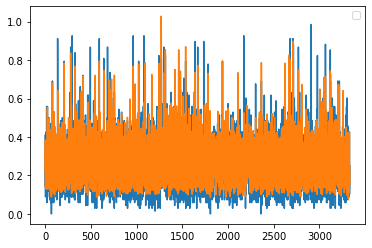

In [15]:
import numpy as np 
import pandas as pd 
 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

plt.figure(3)
Test= plt.plot(y_test)
Predict = plt.plot(prediction)
plt.legend([Predict,Test],["Predicted Data","Real Data"])
plt.show()

In [16]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math

fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Valid'))
fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')
fig.show()

In [17]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

105/105 [==============================] - 0s 1ms/step - loss: 0.0057 - mae: 0.0463
Mean squared error on test data:  0.0056900037452578545
Mean absolute error on test data:  0.04626750573515892


**GRNN APPLICATION:** #NOTES


GRNN is an adaptation in terms of neural network of the Nadaraya-Watson estimator, with which the general regression of a scalar on a vector independent variable is computed as a locally weighted average with a kernel as a weighting function. The main advantage of this algorithm is that its calibration only requires the definition of a proper bandwidth for the kernel estimation. Hence, GRNN is faster than other feedforward artificial neural network algorithms.


*   GRNN Network is sensitive for cases when one input feature has higher values than the other one. Input data has to be normalized before training.

*   Standard deviation has to match the range of the input features Check std parameter description for more information.



*   Network uses lazy learning which mean that network doesn’t need iterative training. It just stores parameters and use them to make a predictions.

*   The bigger training dataset the slower prediction. Algorithm is much more efficient for small datasets.





In [19]:
#----------------------------METHOD 1-----------------------------
!pip install pyGRNN

  Created wheel for pyGRNN: filename=pyGRNN-0.1-cp36-none-any.whl size=11514 sha256=14197afb71255bcd0a3f80e11853b772f8382353a4a6fe5a083bc865f5fcfda8
  Stored in directory: /root/.cache/pip/wheels/8d/8f/70/6444a53fee4d72862fe76fff1987ce58a5d54d7a9fa20a4641
Successfully built pyGRNN


In [37]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
from pyGRNN import GRNN
from sklearn import preprocessing


# Example 1: use Isotropic GRNN with a Grid Search Cross validation to select the optimal bandwidth
IGRNN = GRNN(bnds=(0, None), calibration='None', kernel='RBF', method='L-BFGS-B',
     n_restarts_optimizer=0, n_splits=5, seed=42, sigma=3.989999999999998)  #best model found by GridCVSearch

IGRNN.fit(X_train, y_train.ravel())
y_pred = IGRNN.predict(X_test)
mse_IGRNN = MSE(y_test, y_pred)

In [38]:
#Grid CV Search part to find the best model
params_IGRNN = {'kernel':["RBF"],
                'sigma' : list(np.arange(0.1, 4, 0.01)),
                'calibration' : ['None']
                 }
grid_IGRNN = GridSearchCV(estimator=IGRNN,
                          param_grid=params_IGRNN,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1
                          )
grid_IGRNN.fit(X_train, y_train.ravel())
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 390 candidates, totalling 1950 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [29]:
print(mse_IGRNN)

0.019888307250956243


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

Legend does not support [<matplotlib.lines.Line2D object at 0x7fd138d685f8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

Legend does not support [<matplotlib.lines.Line2D object at 0x7fd138d2b860>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists



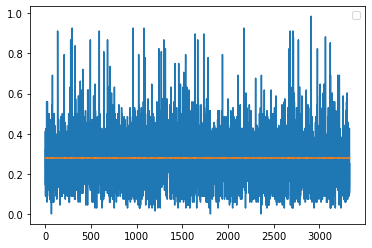

In [30]:
plt.figure(3)
Test= plt.plot(y_test)
Predict = plt.plot(y_pred)
plt.legend([Predict,Test],["Predicted Data","Real Data"])
plt.show()

In [32]:
! pip install neupy
from neupy import algorithms


     |████████████████████████████████| 235kB 7.8MB/s 
     |████████████████████████████████| 92.6MB 115kB/s 
     |████████████████████████████████| 3.2MB 53.0MB/s 
     |████████████████████████████████| 51kB 10.2MB/s 
     |████████████████████████████████| 368kB 57.2MB/s 
  Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progressbar2-3.38.0
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0


NameError: ignored

In [35]:
nw = algorithms.GRNN(std=0.1, verbose=False)
nw.train(X_train, y_train)
y_predicted = nw.predict(X_test)
mse = np.mean((y_predicted - y_test) ** 2)
mse

0.005787825932792448

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

Legend does not support [<matplotlib.lines.Line2D object at 0x7fd138940eb8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

Legend does not support [<matplotlib.lines.Line2D object at 0x7fd1388e4630>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists



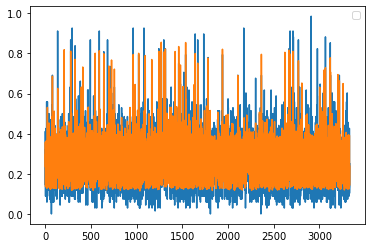

In [36]:
plt.figure(3)
Test= plt.plot(y_test)
Predict = plt.plot(y_predicted)
plt.legend([Predict,Test],["Predicted Data","Real Data"])
plt.show()

**RBFNN:**

the Gaussians have different colors and are weighted differently. When we take the sum, we get a continuous function! To do this, we need to know where to place the Gaussian centers c_j and their standard deviations \sigma_j.

We can use k-means clustering on our input data to figure out where to place the Gaussians. The reasoning behind this is that we want our Gaussians to “span” the largest clusters of data since they have that bell-curve shape.

The next step is figuring out what the standard deviations should be. There are two approaches we can take: set the standard deviation to be that of the points assigned to a particular cluster c_j or we can use a single standard deviation for all clusters \sigma_j = \sigma \forall j where \sigma=\frac{d_\text{max}}{\sqrt{2k}} where d_\text{max} is the maximum distance between any two cluster centers. and k is the number of cluster centers.

But wait, how many Gaussians do we use? Well that’s a hyperparameter called the number of bases or kernels k.

Backpropagation for RBF nets
K-means clustering is used to determine the centers c_j for each of the radial basis functions \varphi_j. Given an input x, an RBF network produces a weighted sum output.

  \begin{equation*} F(x)=\displaystyle\sum_{j=1}^k w_j\varphi_j(x, c_j) + b \end{equation*}
where w_j are the weights, b is the bias, k is the number of bases/clusters/centers, and \varphi_j(\cdot) is the Gaussian RBF:

  \begin{equation*} \varphi_j(x, c_j) = \exp\left(\displaystyle\frac{-||x-c_j||^2}{2\sigma_j^2} \right) \end{equation*}
There are other kinds of RBFs, but we’ll stick with our Gaussian RBF. (Notice that we don’t have the constant up front, so our Gaussian is not normalized, but that’s ok since we’re not using it as a probability distribution!)

Using these definitions, we can derive the update rules for w_j and b for gradient descent. We use the quadratic cost function to minimize.

  \begin{equation*} C = \displaystyle\sum_{i=1}^N (y^{(i)}-F(x^{(i)}))^2 \end{equation*}
We can derive the update rule for w_j by computing the partial derivative of the cost function with respect to all of the w_j.

  \begin{align*} \displaystyle\frac{\partial C}{\partial w_j} &= \displaystyle\frac{\partial C}{\partial F} \displaystyle\frac{\partial F}{\partial w_j}\\ &=\displaystyle\frac{\partial }{\partial F}[\displaystyle\sum_{i=1}^N (y^{(i)}-F(x^{(i)}))^2]~\cdot~\displaystyle\frac{\partial }{\partial w_j}[\displaystyle\sum_{j=0}^K w_j\varphi_j(x,c_j) + b]\\ &=-(y^{(i)}-F(x^{(i)}))~\cdot~\varphi_j(x,c_j)\\ w_j &\gets w_j + \eta~(y^{(i)}-F(x^{(i)}))~\varphi_j(x,c_j) \end{align*}
Similarly, we can derive the update rules for b by computing the partial derivative of the cost function with respect to b.

  \begin{align*} \displaystyle\frac{\partial C}{\partial b} &= \displaystyle\frac{\partial C}{\partial F} \displaystyle\frac{\partial F}{\partial b}\\ &=\displaystyle\frac{\partial }{\partial F}[\displaystyle\sum_{i=1}^N (y^{(i)}-F(x^{(i)}))^2]~\cdot~\displaystyle\frac{\partial }{\partial b}[\displaystyle\sum_{j=0}^K w_j\varphi_j(x,c_j) + b]\\ &=-(y^{(i)}-F(x^{(i)}))\cdot 1\\ b &\gets b + \eta~(y^{(i)}-F(x^{(i)})) \end{align*}
Now we have our backpropagation rules!

----CODING: ------

In [49]:

import numpy as np


class RBFN(object):

    def __init__(self, hidden_shape, sigma=1.0):
        """ radial basis function network
        # Arguments
            input_shape: dimension of the input data
            e.g. scalar functions have should have input_dimension = 1
            hidden_shape: the number
            hidden_shape: number of hidden radial basis functions,
            also, number of centers.
        """
        self.hidden_shape = hidden_shape
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def _kernel_function(self, center, data_point):
        return np.exp(-self.sigma*np.linalg.norm(center-data_point)**2)

    def _calculate_interpolation_matrix(self, X):
        """ Calculates interpolation matrix using a kernel_function
        # Arguments
            X: Training data
        # Input shape
            (num_data_samples, input_shape)
        # Returns
            G: Interpolation matrix
        """
        G = np.zeros((len(X), self.hidden_shape))
        for data_point_arg, data_point in enumerate(X):
            for center_arg, center in enumerate(self.centers):
                G[data_point_arg, center_arg] = self._kernel_function(
                        center, data_point)
        return G

    def _select_centers(self, X):
        random_args = np.random.choice(len(X), self.hidden_shape)
        centers = X[random_args]
        return centers

    def fit(self, X, Y):
        """ Fits weights using linear regression
        # Arguments
            X: training samples
            Y: targets
        # Input shape
            X: (num_data_samples, input_shape)
            Y: (num_data_samples, input_shape)
        """
        self.centers = self._select_centers(X)
        G = self._calculate_interpolation_matrix(X)
        self.weights = np.dot(np.linalg.pinv(G), Y)

    def predict(self, X):
        """
        # Arguments
            X: test data
        # Input shape
            (num_test_samples, input_shape)
        """
        G = self._calculate_interpolation_matrix(X)
        predictions = np.dot(G, self.weights)
        return predictions

In [71]:
# fitting RBF-Network with data
model = RBFN(hidden_shape=10, sigma=1.)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = np.mean((y_pred - y_test) ** 2)
mse

0.0051655255330723005

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

Legend does not support [<matplotlib.lines.Line2D object at 0x7fd137e32208>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

Legend does not support [<matplotlib.lines.Line2D object at 0x7fd137ec28d0>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists



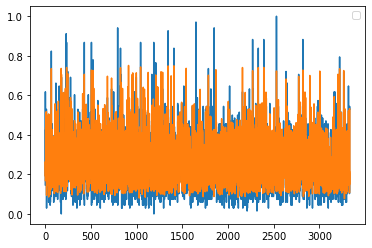

In [72]:
plt.figure(3)
Test= plt.plot(y_test)
Predict = plt.plot(y_pred)
plt.legend([Predict,Test],["Predicted Data","Real Data"])
plt.show()

Not: RBF networks are similar to K-Means clustering and PNN/GRNN networks. The main difference is that PNN/GRNN networks have one neuron for each point in the training file, whereas RBF networks have a variable number of neurons that is usually much less than the number of training points. For problems with small to medium size training sets, PNN/GRNN networks are usually more accurate than RBF networks, but PNN/GRNN networks are impractical for large training sets.